<a href="https://colab.research.google.com/github/abhishtmishra/Computer-Vision-Multi-Class-Image-Classification/blob/main/Multiclass_Image_Classification_Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/catsdogs.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close() '[;
  ]'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# Generators: divides the image data into small batches to ease the load on RAM and prevent it from crashing
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', # this will assign '0' to 'cats' and '1' to 'dogs'
    batch_size = 32,
    image_size = (256, 256) # this resizes all the images to 256x256 as the CNN model expects the input images to be of same size
)

val_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', # this will assign '0' to 'cats' and '1' to 'dogs'
    batch_size = 32,
    image_size = (256, 256) # this resizes all the images to 256x256 as the CNN model expects the input images to be of same size
)

# the images here are saved as numpy array

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Applying Normalization
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
val_dataset = val_dataset.map(process)
# .map() will pick every image and its label one-by-one and send it to the process() to perform normalization of pixel intensities

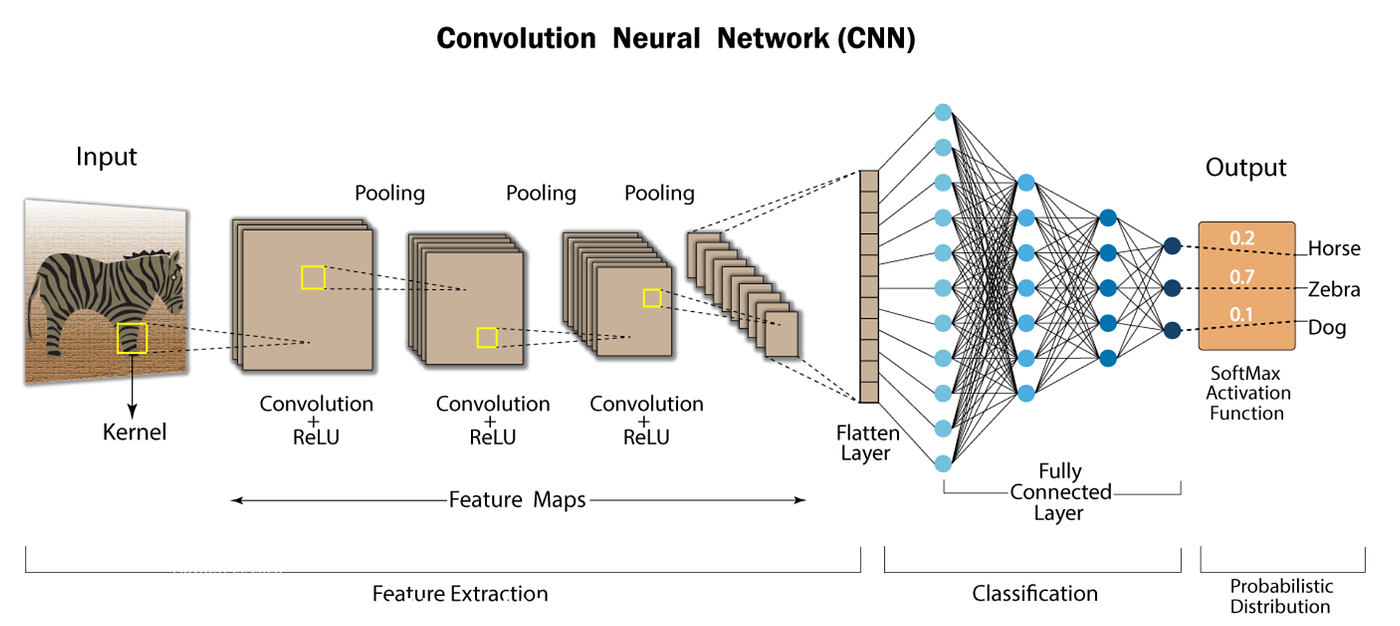

In [ ]:
# CNN Model
'''
Architecture will have 3 convolution layers
- 1st Layer will have 32 filters
- 2nd Layer will have 64 filters
- 3rd Layer will have 128 filters
'''

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3))) # 1st convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu')) # 2nd convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu')) # 3rd convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

# Fully Connected Layers: 3
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) # output layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
# as this is a binary classification problem, we have used binary cross entropy as our loss function

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.4870 - accuracy: 0.5919 - val_loss: 0.6074 - val_accuracy: 0.6810
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5565 - accuracy: 0.7191 - val_loss: 0.5344 - val_accuracy: 0.7328
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4658 - accuracy: 0.7829 - val_loss: 0.4385 - val_accuracy: 0.8022
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4017 - accuracy: 0.8205 - val_loss: 0.5693 - val_accuracy: 0.7112
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3352 - accuracy: 0.8535 - val_loss: 0.4743 - val_accuracy: 0.8130
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2641 - accuracy: 0.8886 - val_loss: 0.5604 - val_accuracy: 0.7908
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1940 - accuracy: 0.9237 - val_loss: 0.4944 - val_ac

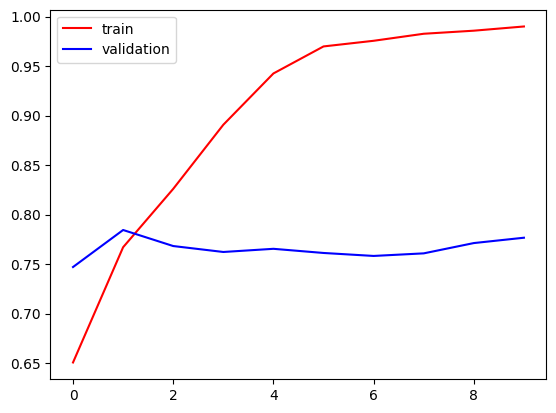

In [ ]:
# plotting training accuracy vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

# with every increase in epoch, the training accuracy is improving, but validation accuracy is fluctuating between 75%-80%,
# creating a gap that clearly indicates the case of overfitting

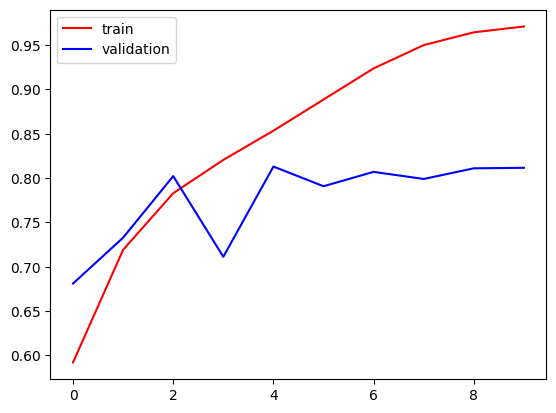

In [ ]:
# plotting training accuracy vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

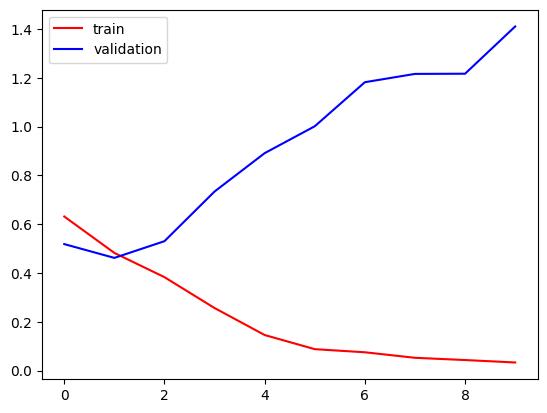

In [ ]:
# plotting training loss vs validation loss

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# with every increase in epoch, training loss is reducing, but validation loss is increasing significantly, which leads to the increase
# in the gap, which is a clear indicator of overfitting.

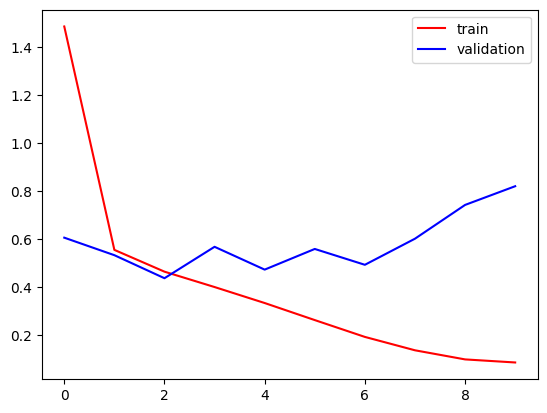

In [ ]:
# plotting training loss vs validation loss

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
'''
Ways to reduce overfitting:
- Add more data
- Data Augmentation -> using existing data, we create more data
- L1/L2 Regularization
- Dropout
- Batch Normalization
- Reduce Complexity
'''

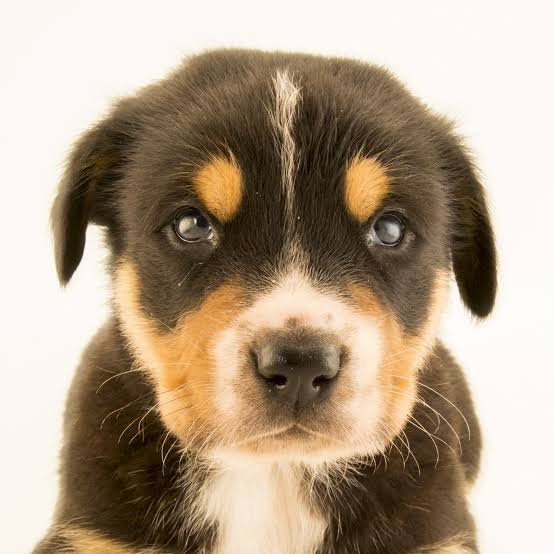

In [ ]:
# predictions
import cv2
from google.colab.patches import cv2_imshow

test_image = cv2.imread('/content/dog.jpeg')
cv2_imshow(test_image)

In [ ]:
test_image.shape

(554, 554, 3)

In [ ]:
test_image = cv2.resize(test_image, (256,256))

In [ ]:
test_input = test_image.reshape((1, 256, 256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
print(tf.__version__)

2.14.0
